

### Regression and Classification with the Ames Housing Data

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [104]:
import numpy as np
from pandas.core import datetools
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ggplot
import sklearn
from pandas.lib import Timestamp
from pandas.lib import Timestamp
sns.set_style('whitegrid')
from pandas.lib import Timestamp
%config InlineBackend.figure_format = 'retina'
%matplotlib inline



## Estimating the value of homes from fixed characteristics.


job is to tackle #1. we  have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
- Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

In [31]:
# Load the data
house = pd.read_csv('./housing.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
# Data has 81 columns and 1460 rows , to get some idea on the column variables and row values
#lets look into the data dictionary 
f = open('data_description.txt','r') 
f.readlines()

# lot of lines to read

['MSSubClass: Identifies the type of dwelling involved in the sale.\t\n',
 '\n',
 '        20\t1-STORY 1946 & NEWER ALL STYLES\n',
 '        30\t1-STORY 1945 & OLDER\n',
 '        40\t1-STORY W/FINISHED ATTIC ALL AGES\n',
 '        45\t1-1/2 STORY - UNFINISHED ALL AGES\n',
 '        50\t1-1/2 STORY FINISHED ALL AGES\n',
 '        60\t2-STORY 1946 & NEWER\n',
 '        70\t2-STORY 1945 & OLDER\n',
 '        75\t2-1/2 STORY ALL AGES\n',
 '        80\tSPLIT OR MULTI-LEVEL\n',
 '        85\tSPLIT FOYER\n',
 '        90\tDUPLEX - ALL STYLES AND AGES\n',
 '       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n',
 '       150\t1-1/2 STORY PUD - ALL AGES\n',
 '       160\t2-STORY PUD - 1946 & NEWER\n',
 '       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n',
 '       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES\n',
 '\n',
 'MSZoning: Identifies the general zoning classification of the sale.\n',
 '\t\t\n',
 '       A\tAgriculture\n',
 '       C\tCommercial\n',
 '       FV\tFloat

In [33]:
# A: Get the datatypes,Shape of the data frame  
print house.dtypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [34]:
# checking the Missing Values from the data 
mv = house.isnull().sum()
mv[mv>0].sort_values(ascending = False)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [38]:
# As we can see the most number of missing values are from PoolQC ,MiscFeature,Alley,Fence,FireplaceQu drop them and 
# assign the result to new dataframe

house_res= house.drop(['PoolQC' ,'MiscFeature','Alley','Fence','FireplaceQu'],axis=1)


In [39]:
# check the result of above step with null values in data
s = house_res.isnull().sum()
print s[s>0]


LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


In [41]:
# as per the question we need to consider the residential type houses only .
#this can be checked by the column MSzoning

house_res.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [42]:
#Drop all the rows which have the MSzoning column values other than resdential 
house_res = house_res[house_res.MSZoning != 'C (all)']
house_res.MSZoning.value_counts()

RL    1151
RM     218
FV      65
RH      16
Name: MSZoning, dtype: int64

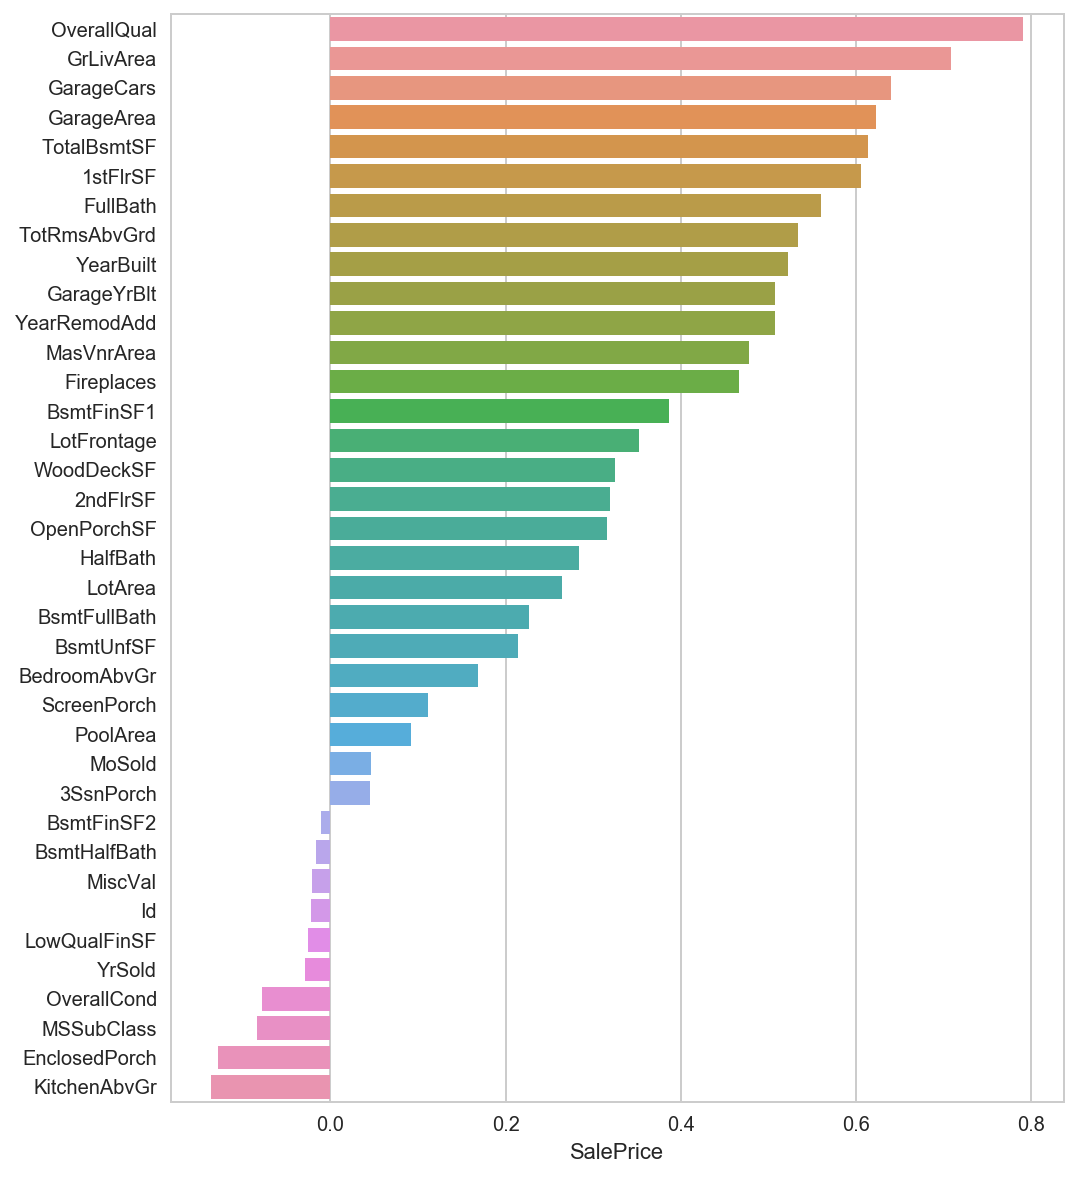

In [108]:
# Feature sorted by correlation to SalePrice, from positive to negative

corr = house.corr().sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show()

In [43]:
# list of columns with float datatype for caluculating correalation matrix
house_res_corr = house_res.loc[:, house_res.dtypes != object]
house_res_corr.isnull().sum()


Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       79
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [45]:
# correation materix with respect to SalePrice
x = house_res.corr()['SalePrice']
x

Id              -0.024353
MSSubClass      -0.087487
LotFrontage      0.354848
LotArea          0.264715
OverallQual      0.789031
OverallCond     -0.089084
YearBuilt        0.517602
YearRemodAdd     0.501186
MasVnrArea       0.475950
BsmtFinSF1       0.384475
BsmtFinSF2      -0.014145
BsmtUnfSF        0.216152
TotalBsmtSF      0.612088
1stFlrSF         0.603300
2ndFlrSF         0.319774
LowQualFinSF    -0.018755
GrLivArea        0.708658
BsmtFullBath     0.224054
BsmtHalfBath    -0.017561
FullBath         0.556674
HalfBath         0.280882
BedroomAbvGr     0.162008
KitchenAbvGr    -0.137825
TotRmsAbvGrd     0.533355
Fireplaces       0.463264
GarageYrBlt      0.486058
GarageCars       0.642135
GarageArea       0.629831
WoodDeckSF       0.320770
OpenPorchSF      0.329491
EnclosedPorch   -0.120765
3SsnPorch        0.043807
ScreenPorch      0.110540
PoolArea         0.092396
MiscVal         -0.021052
MoSold           0.051987
YrSold          -0.025391
SalePrice        1.000000
Name: SalePr

In [63]:
# selecting the columns which have values with greater than 0.5
x[x>0.5]

OverallQual     0.789031
YearBuilt       0.517602
YearRemodAdd    0.501186
TotalBsmtSF     0.612088
1stFlrSF        0.603300
GrLivArea       0.708658
FullBath        0.556674
TotRmsAbvGrd    0.533355
GarageCars      0.642135
GarageArea      0.629831
SalePrice       1.000000
Name: SalePrice, dtype: float64

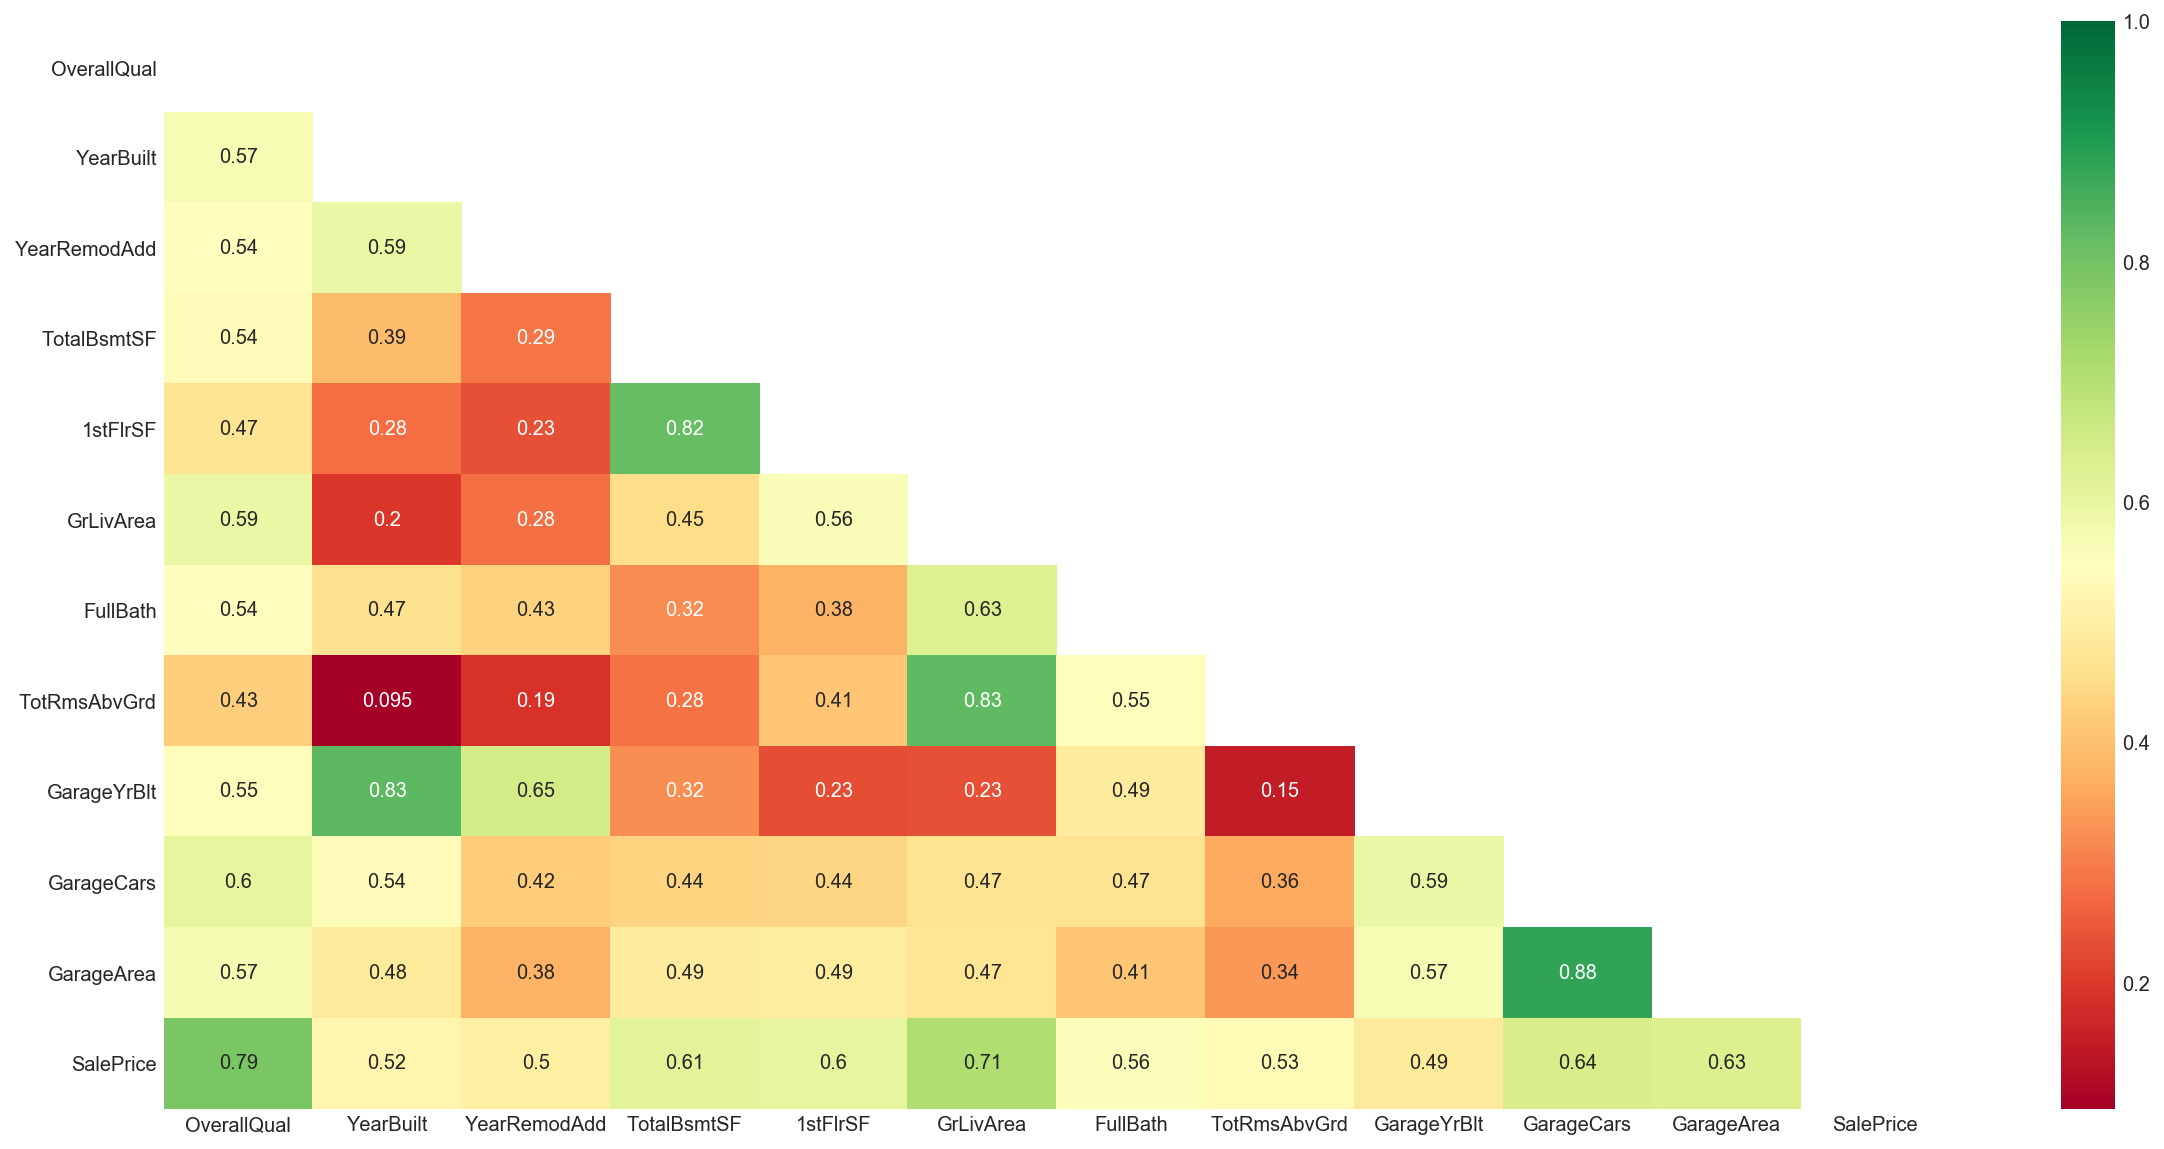

In [46]:
# selecting the above columns and Yrsold column so that we can split our data based on the Yearsold column.

columns = ['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageYrBlt',
            'GarageCars','GarageArea','SalePrice']

col= house_res[columns]
plt.figure(figsize=(20,10))
mask = np.zeros_like(col.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
g = sns.heatmap(col.corr(),cmap="RdYlGn",annot=True,mask=mask)

In [81]:
house_res[res_col].isnull().sum()

# Fill the null values of GarageYrBlt with YearBuilt 

#house_res['GarageYrBlt'].fillna(house['YearBuilt'], inplace=True)

OverallQual     0
YearRemodAdd    0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
GarageYrBlt     0
GarageArea      0
SalePrice       0
dtype: int64

In [82]:
# get rid of columns which are multi collinear and consider the rest of them as fixed charctersitics variables.
# below is the resulting columns.
res_col = ['OverallQual','YearRemodAdd','TotalBsmtSF','GrLivArea','FullBath','GarageYrBlt','GarageArea','SalePrice']

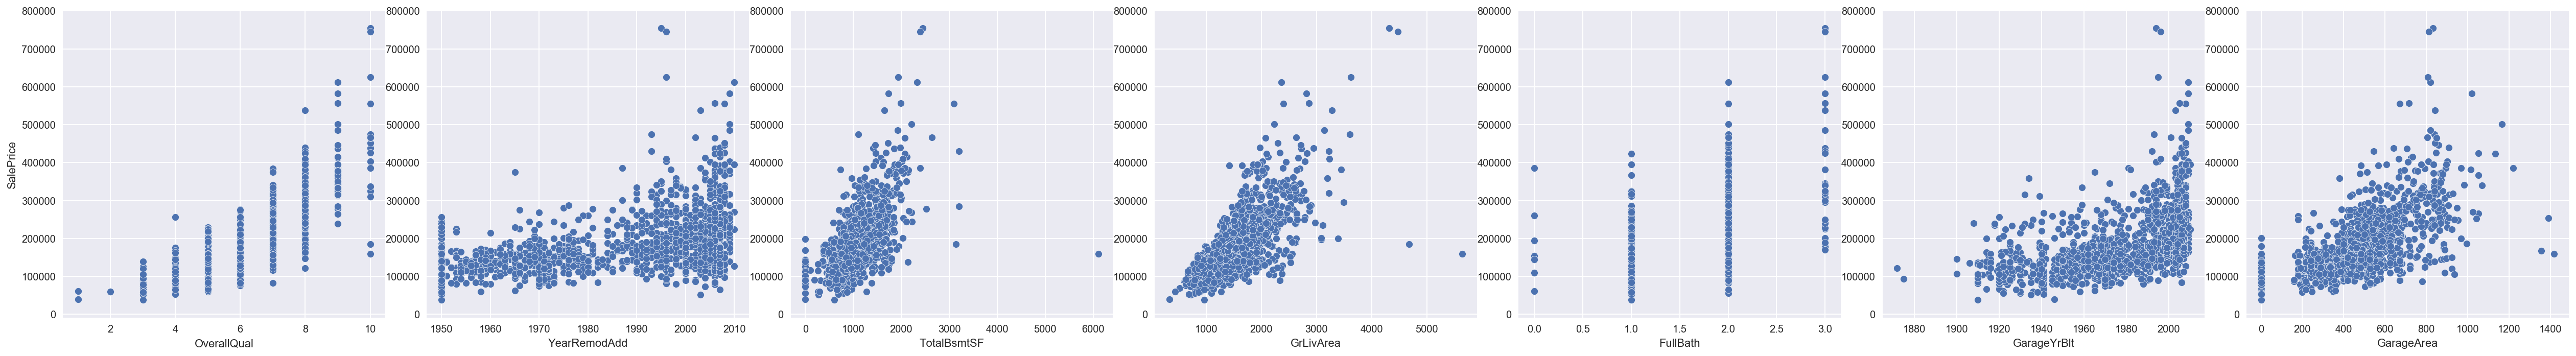

In [83]:
# Distribution against the saleprice 
_ = sns.pairplot(house_res[res_col],x_vars=['OverallQual','YearRemodAdd','TotalBsmtSF','GrLivArea','FullBath',
                                        'GarageYrBlt','GarageArea'],y_vars='SalePrice',aspect=1,size=5)


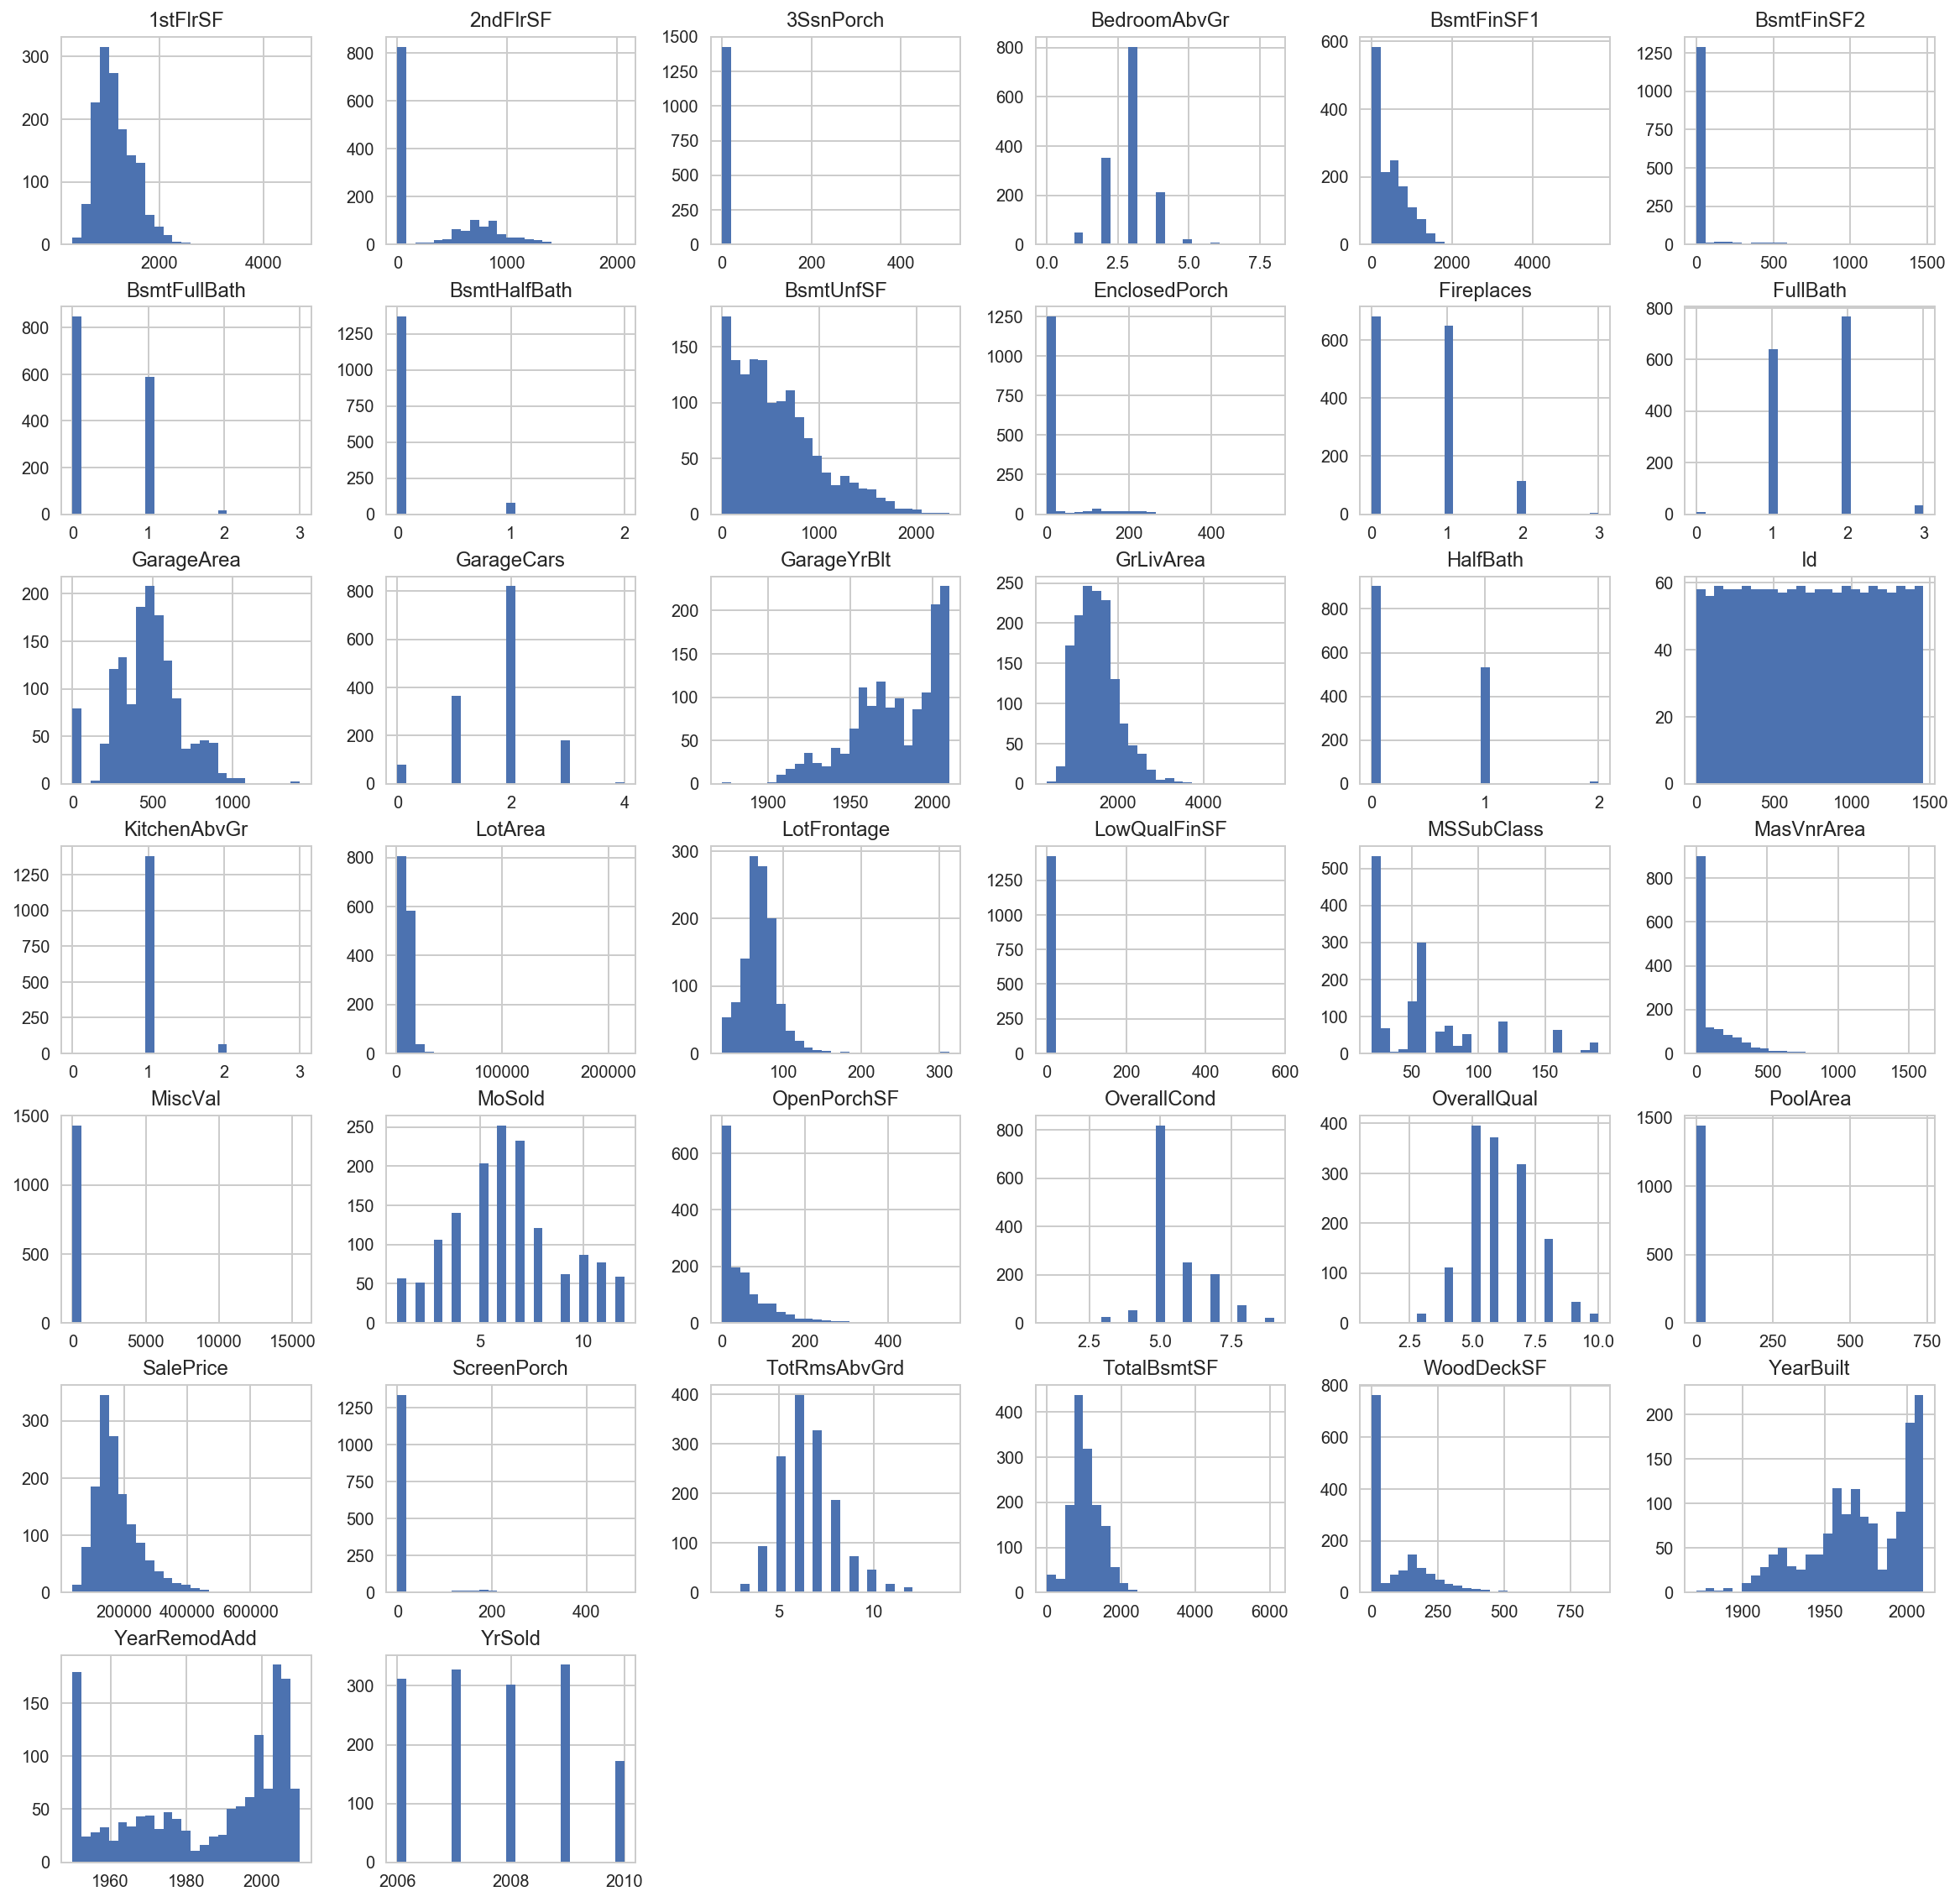

In [109]:
# ploting the distribution of selected fixed features 
house_res.hist(figsize=(20,20),bins=25)
plt.show()

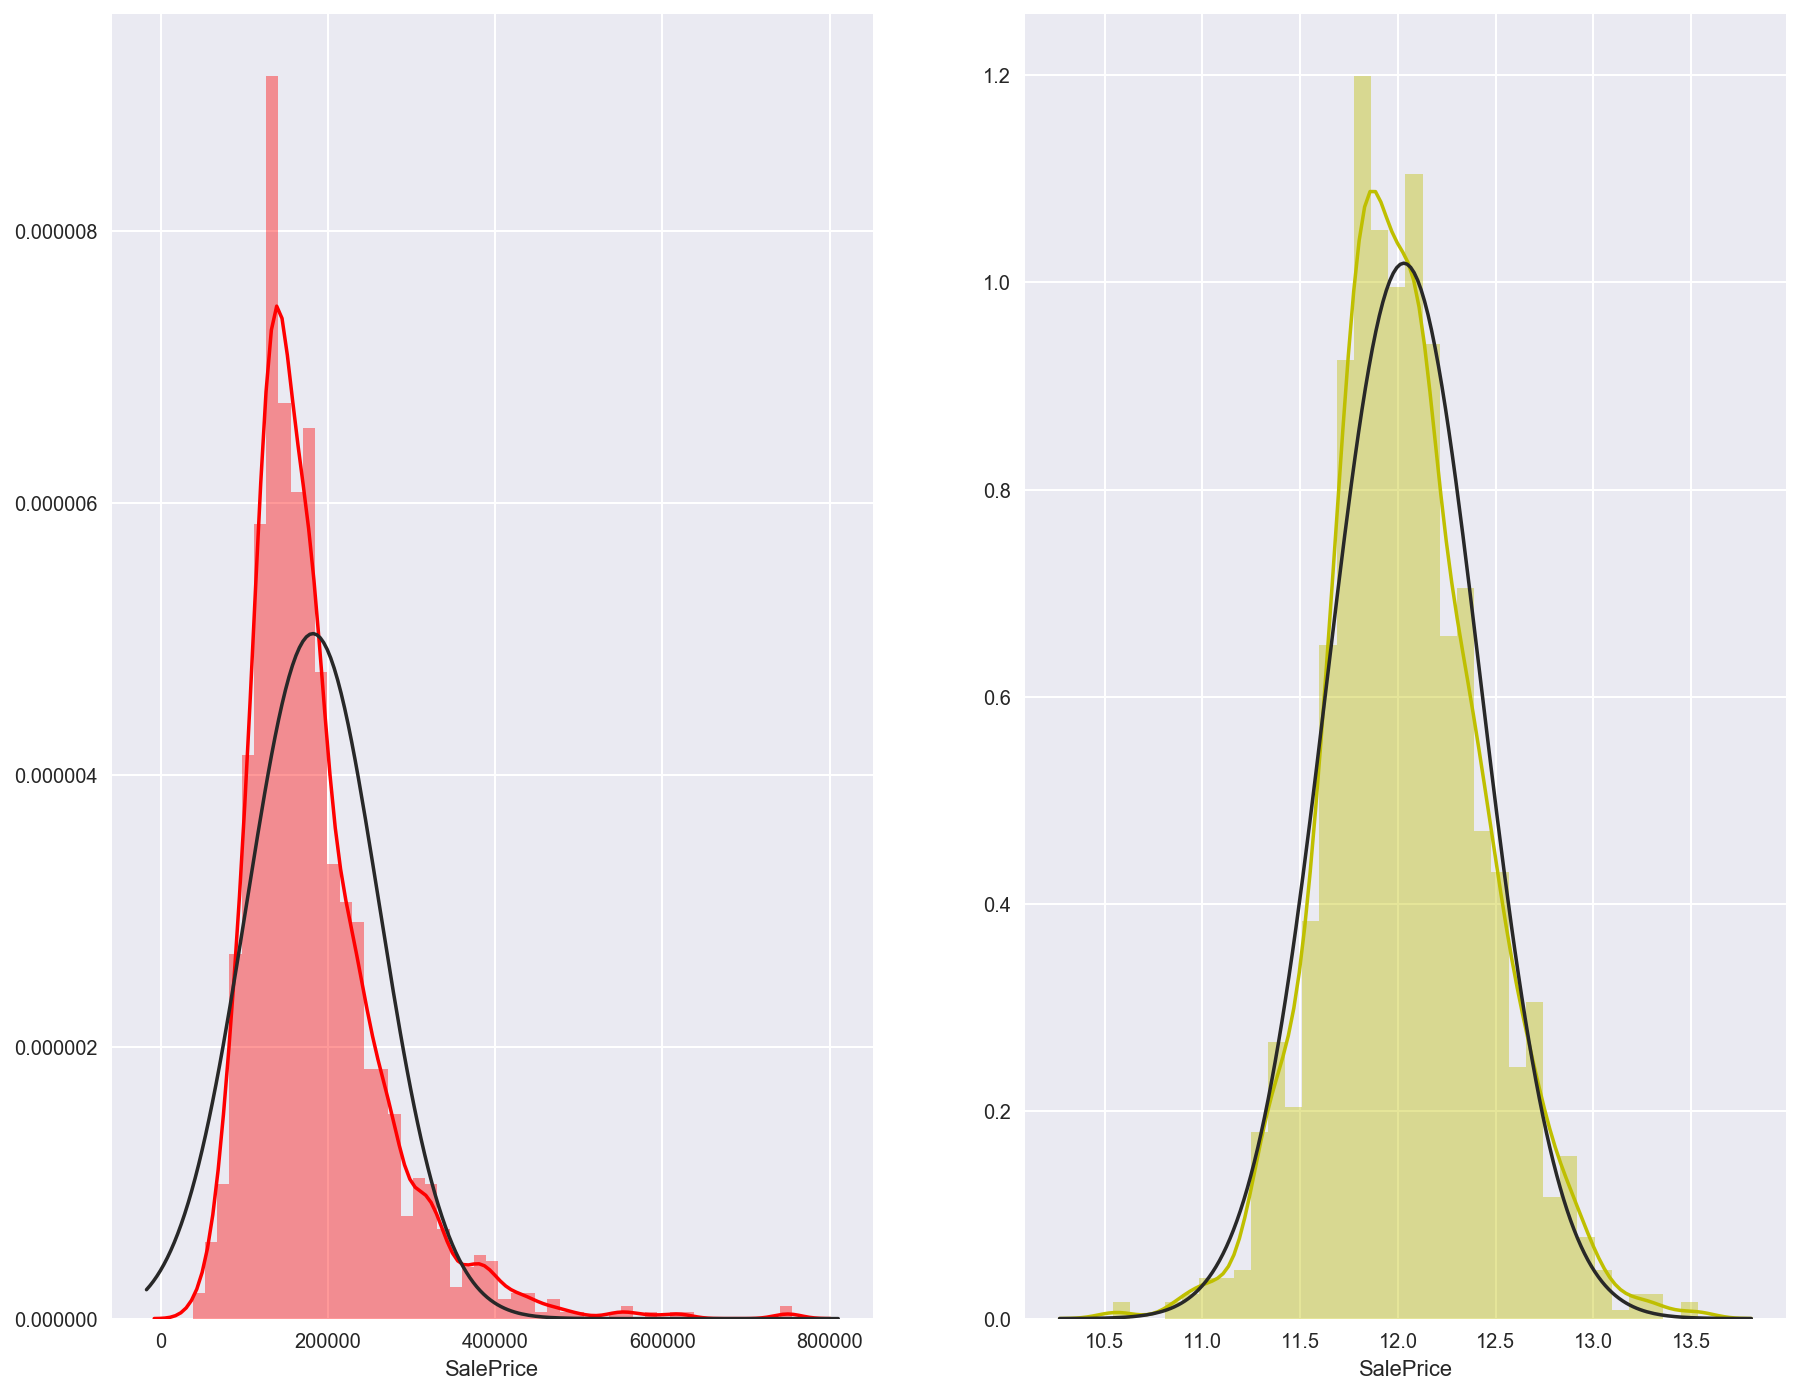

In [85]:
# check the distribution of Sale Price 
from scipy.stats import norm
ax=plt.subplots(figsize=(15,12))
plt.subplot(1,2,1)
sns.set()
ax = sns.distplot(house_res['SalePrice'],color='r',fit=norm)

# we can see the saleprice is skewed to its right , if you apply log to it it becomes normalized.
plt.subplot(1,2,2)
sns.set()
ax = sns.distplot(np.log(house_res['SalePrice']),color='y',fit=norm)

In [86]:
# split the data into train and test based on pre 2010 and post 2010 
# as our cleaned Data doesnt have the yearsold feature column add it.
 
res_col1 = ['SalePrice','OverallQual','YearRemodAdd','TotalBsmtSF','GrLivArea','FullBath','GarageYrBlt','GarageArea','YrSold']

a = house_res[res_col1]

house_res_pre2010 = a[a.YrSold<2010]

house_res_2010 = a[a.YrSold ==2010]

print house_res_pre2010.shape ,house_res_2010.shape

(1278, 9) (172, 9)


In [87]:
# split the inputs data into train and test based on pre2010 and post2010 and removing the YrSold,SalePrice feature 

Xtrain = house_res_pre2010.drop(['SalePrice','YrSold'],axis=1)
Xtest = house_res_2010.drop(['SalePrice','YrSold'],axis=1)


In [88]:
# shape of the  inputs test and train data
print  Xtrain.shape , Xtest.shape  

(1278, 7) (172, 7)


In [89]:
# get the Target test and train Data ie SalePrice
ytrain = house_res_pre2010.SalePrice
ytest = house_res_2010.SalePrice

In [90]:
# shape of the targets test and train data
print ytrain.shape , ytest.shape

(1278,) (172,)


In [91]:
# Standardizing the input test and train data 
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
Xtrain_S = ss.fit_transform(Xtrain)
Xtest_S = ss.fit_transform(Xtest)


# Using Linear Regression model to predict the Sales Price

Score: 0.790851880998
RMSE: 36464.2025001 

[ 29651.46681903   7476.67320817  11700.46983463  25155.63736032
   -335.20764912   2606.01191698  11030.98699238] 181989.782473

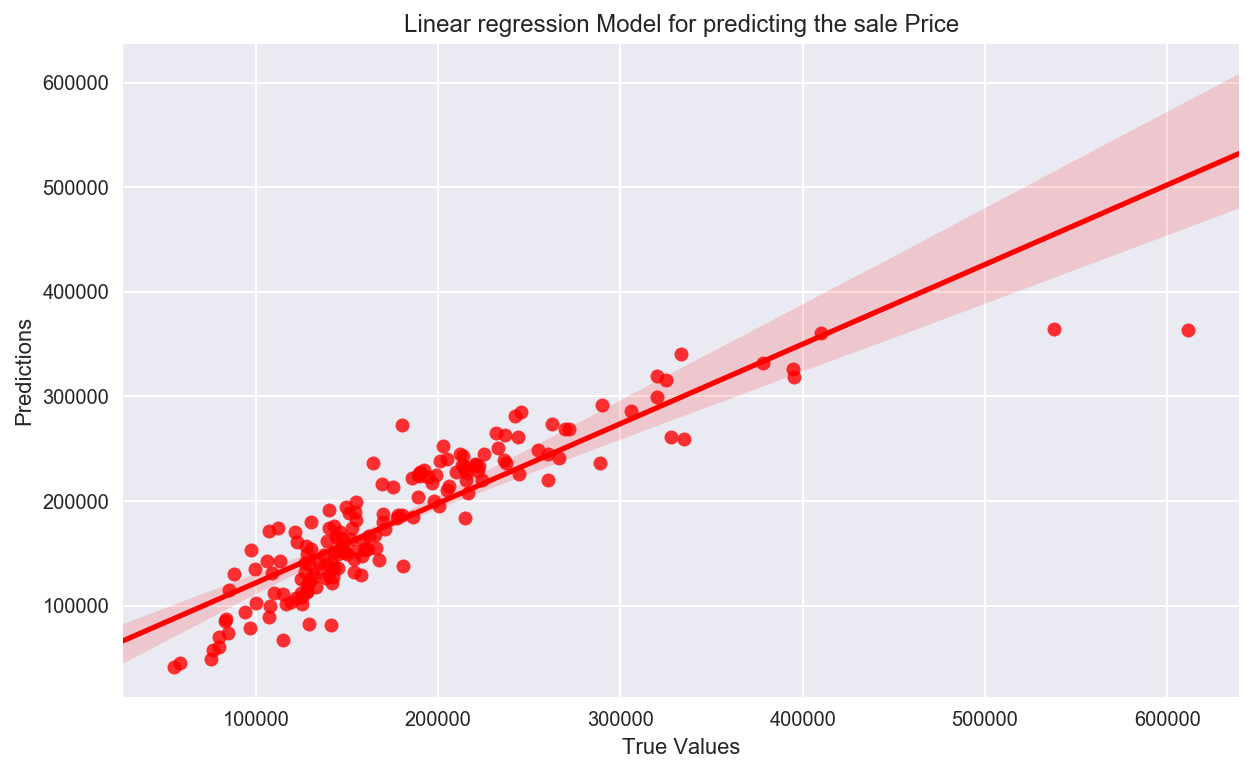

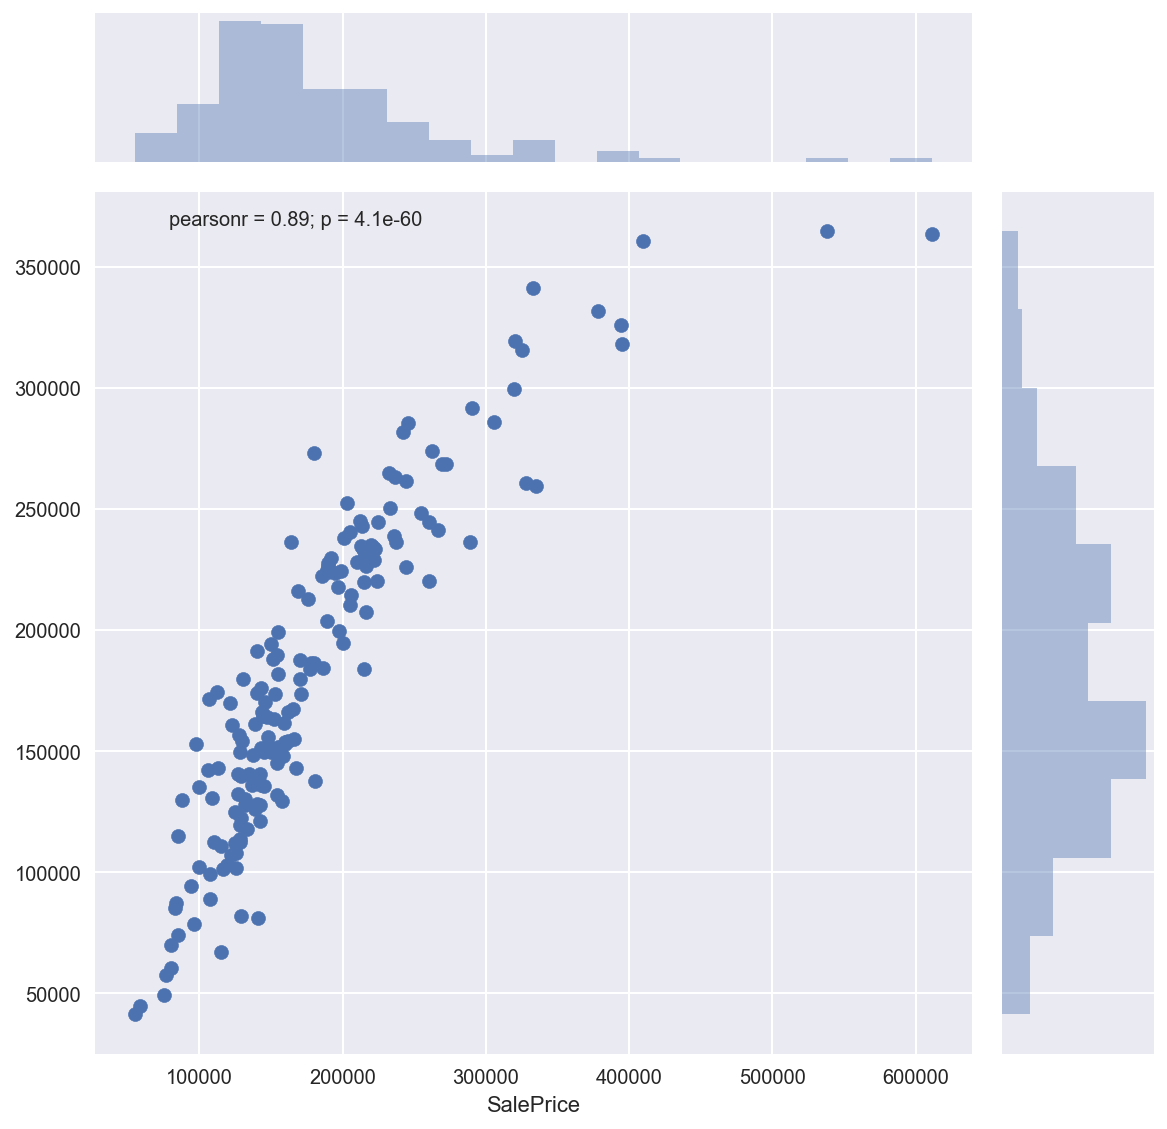

In [92]:
# Linear Regression model
from sklearn import linear_model
from sklearn import metrics as skl
lm = linear_model.LinearRegression(normalize=True)

model = lm.fit(Xtrain_S, ytrain)
predictions = lm.predict(Xtest_S)

## The line / model
# plt.scatter(ytest, predictions)
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.show()
print "Score:", model.score(Xtest_S, ytest)

# calculate RMSE
print "RMSE:", np.sqrt(skl.mean_squared_error(ytest, predictions)),'\n'

# examine the coefficients
print lm.coef_,
print lm.intercept_,

fig, ax_arr = plt.subplots(1,1, figsize=(10,6))
axis0 = sns.regplot(ytest,predictions ,color='red', ax=ax_arr,)
plt.title("Linear regression Model for predicting the sale Price")
plt.xlabel("True Values")
plt.ylabel("Predictions")

sns.jointplot(ytest,predictions,size=8)
plt.show()

In [93]:
# cross validating the Train and Test data seperately. and checking the score .

from sklearn.cross_validation import cross_val_score, cross_val_predict
# iterate through folds 5-10

for folds in range(7,12):
    
    # Perform cross-validation for train
    scores = cross_val_score(model,Xtrain_S, ytrain, cv=folds)
    print "Cross-validated scores Train:", scores,
    print "Mean CV R2:", np.mean(scores),
    print 'Std CV R2:', np.std(scores),'\n'
    
    # perform cross validation for test
    scores = cross_val_score(model,Xtest_S,ytest,cv=folds)
    print "Cross-validated scores Test:", scores,
    print "Mean CV R2:", np.mean(scores),
    print 'Std CV R2:', np.std(scores),'\n'
    print ('____________________________________')
    
    #Make cross-validated predictions
    cv_pred = cross_val_predict(model, Xtest_S, ytest, cv=folds)
    r2 = skl.r2_score(ytest, cv_pred)
    print "Cross-Predicted R2:", r2,''
    print ('____________________________________\n')
    

Cross-validated scores Train: [ 0.80964643  0.84524568  0.75350207  0.75701991  0.82782891  0.74452086
  0.40108608] Mean CV R2: 0.734121419977 Std CV R2: 0.14079080653 

Cross-validated scores Test: [ 0.66871685  0.75195131  0.83188919  0.73520218  0.74830603  0.88162173
  0.87492754] Mean CV R2: 0.784659259777 Std CV R2: 0.0737377238591 

____________________________________
Cross-Predicted R2: 0.785248051664 
____________________________________

Cross-validated scores Train: [ 0.82146491  0.82833754  0.72988505  0.77597724  0.81651144  0.75452153
  0.76985258  0.34702525] Mean CV R2: 0.730446944012 Std CV R2: 0.148531076299 

Cross-validated scores Test: [ 0.67073978  0.82088972  0.80746373  0.63557561  0.75299419  0.74884202
  0.82193099  0.90885258] Mean CV R2: 0.770911076586 Std CV R2: 0.0826308716263 

____________________________________


/Applications/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Cross-Predicted R2: 0.782157960954 
____________________________________

Cross-validated scores Train: [ 0.81854629  0.81828737  0.81661052  0.73399777  0.74467334  0.81608185
  0.76841013  0.76524617  0.32633154] Mean CV R2: 0.734242775311 Std CV R2: 0.147678971953 

Cross-validated scores Test: [ 0.6168817   0.82065368  0.84792522  0.65705776  0.75399486  0.70565048
  0.90791847  0.74723252  0.92387509] Mean CV R2: 0.775687754482 Std CV R2: 0.101194298387 

____________________________________
Cross-Predicted R2: 0.790360911721 
____________________________________

Cross-validated scores Train: [ 0.80785691  0.82286702  0.83146677  0.70644694  0.76397102  0.80979526
  0.79305372  0.75920881  0.47258474  0.79717194] Mean CV R2: 0.756442313108 Std CV R2: 0.100831145292 

Cross-validated scores Test: [ 0.67532445  0.76843266  0.73434592  0.81125531  0.51238838  0.74407274
  0.7276219   0.87502787  0.80398501  0.91110841] Mean CV R2: 0.756356264252 Std CV R2: 0.105359816913 

_________

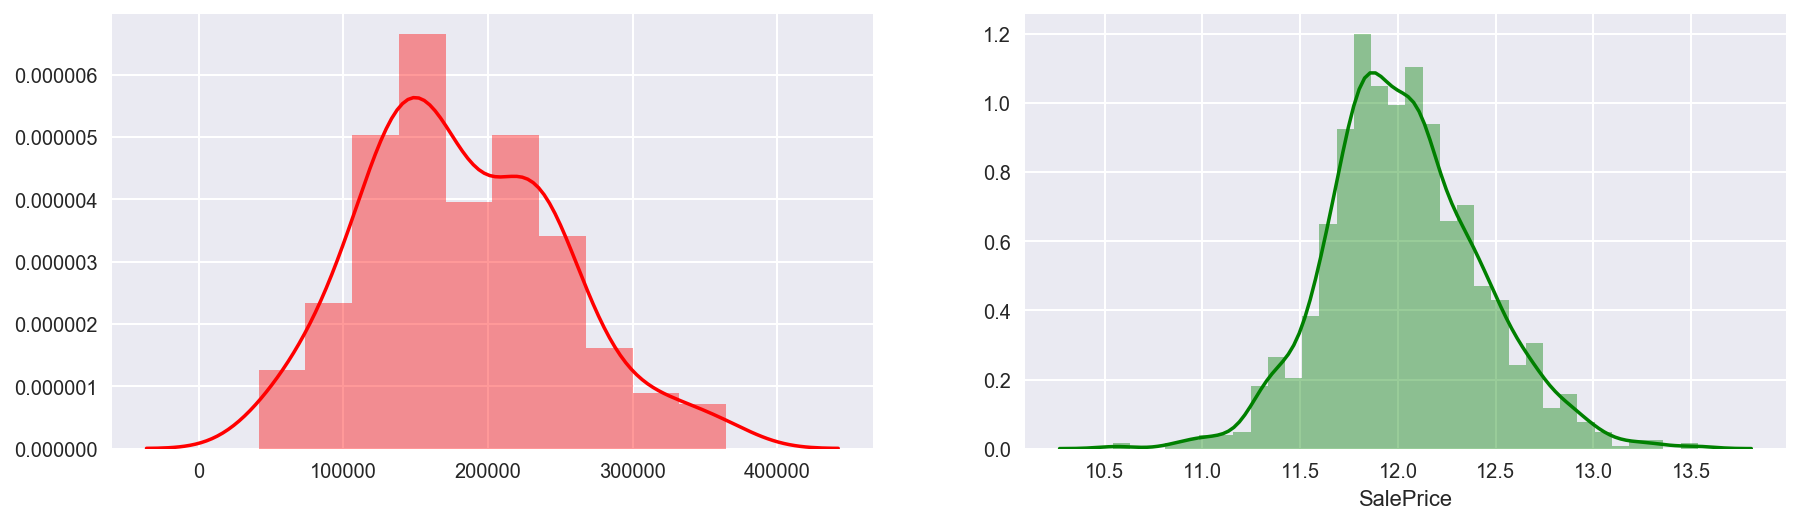

In [94]:
# plotting the predictions and SalePrice spread
ax=plt.subplots(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(predictions,color='r')
plt.subplot(1,2,2)
sns.distplot(np.log(house_res['SalePrice']),color='g')

# Using Hubber Regressor 

Prediction Score: 0.798126575339
Training Set Score: 0.753335325821
RMSE: 35824.432008
179503.607431


Text(0,0.5,u'Predictions')

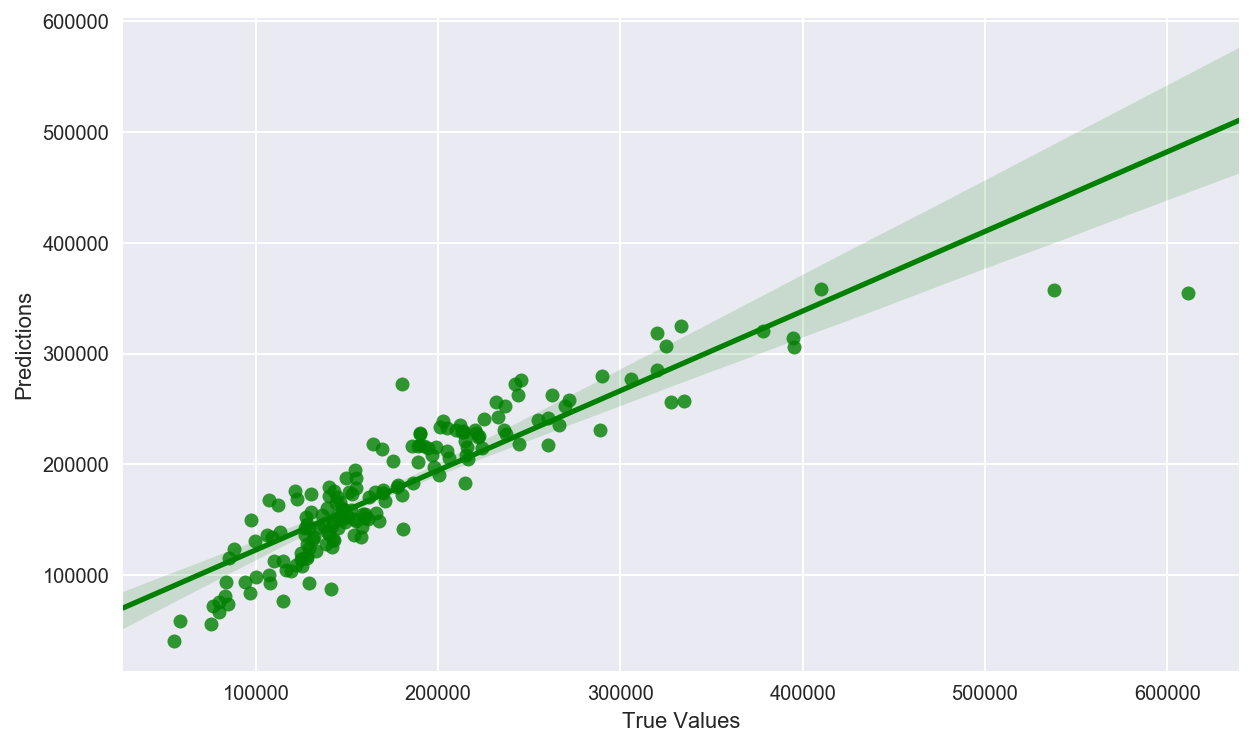

In [96]:
import sklearn.linear_model
huber = sklearn.linear_model.HuberRegressor()

model = huber.fit(Xtrain_S, ytrain)
predictions = huber.predict(Xtest_S)

# ## The line / model
# plt.scatter(ytest, predictions)
# plt.xlabel("True Values")
# plt.ylabel("Predictions")

print "Prediction Score:", model.score(Xtest_S,ytest)
print "Training Set Score:", model.score(Xtrain_S,ytrain)


# calculate RMSE
import numpy as np
print "RMSE:", np.sqrt(skl.mean_squared_error(ytest, predictions))
print huber.intercept_

# plot the graphs
fig, ax_arr = plt.subplots(1,1, figsize=(10,6))
axis0 = sns.regplot(ytest,predictions ,color='green', ax=ax_arr,)
plt.title("")
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [155]:
# ridge regression

# alpha=0 is equivalent to linear regression
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(Xtrain_S, ytrain)
y_pred = ridgereg.predict(Xtest_S)
print "Score:", ridgereg.score(Xtest_S, ytest)
print "RMSE alpha=0: ", np.sqrt(skl.mean_squared_error(ytest, y_pred))




Score: 0.790851880998
RMSE alpha=0:  36464.2025001


In [156]:
alpha_range = [0.001, 0.1, 1, 10, 25, 50, 100, 200]
alpha_range

from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(Xtrain_S, ytrain)
# predict method uses the best alpha value
y_pred = ridgeregcv.predict(Xtest_S)

print "Best alpha: ", ridgeregcv.alpha_
print "Best intercept: ", ridgeregcv.intercept_
print "Score:", ridgeregcv.score(Xtest_S, ytest)
print "RMSE: ",np.sqrt(metrics.mean_squared_error(ytest, y_pred))

Best alpha:  0.1
Best intercept:  181989.782473
Score: 0.786412641291
RMSE:  36849.1530771


In [97]:
#Based on the cross valdation and R2 values my model is predicting only 80% of the prices based on fixed 
# characeristics if given time and more research model can perform better.



## any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that we have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
-  use this second model and its coefficients to determine whether they should buy a property or not? 
- how can we use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.

In [130]:
# A:
#Sorting out the renovatable features and assigning it to a dataframe var. 

renovate = house[['Condition1', 'Condition2', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 
                       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                       'BsmtFinType1', 'BsmtFinType2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 
                       'CentralAir', 'Electrical', 'LowQualFinSF', 'KitchenQual', 'Functional',  
                       'GarageFinish', 'GarageQual', 'GarageCond','SaleCondition', 'YrSold', 'SalePrice'
                      ]].copy()

In [132]:
# checking the null values of columns in the data 
re_null = reno_df.isnull().sum()
re_null[re_null > 0]

Series([], dtype: int64)

In [133]:
# check the datatypes of the missing values columns  and the unique values present so 
# that we can impute the NA or NAN values.

print reno_df.GarageCond.value_counts(dropna=False)
print reno_df.GarageQual.value_counts(dropna=False)
print reno_df.GarageFinish.value_counts(dropna=False)
print reno_df.BsmtFinType2.value_counts(dropna=False)
print reno_df.BsmtFinType1.value_counts(dropna=False)
print reno_df.MasVnrType.value_counts(dropna=False)  
print reno_df.BsmtQual.value_counts(dropna=False)
print reno_df.BsmtCond.value_counts(dropna=False)

83    1319
80      34
81       9
82       7
79       2
29       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
32       1
30       1
31       1
20       1
33       1
34       1
35       1
36       1
37       1
21       1
18       1
19       1
39       1
1        1
2        1
3        1
4        1
      ... 
71       1
61       1
72       1
73       1
74       1
75       1
76       1
77       1
78       1
62       1
60       1
42       1
50       1
43       1
44       1
45       1
46       1
47       1
48       1
49       1
51       1
59       1
52       1
53       1
54       1
55       1
56       1
57       1
58       1
0        1
Name: GarageCond, Length: 84, dtype: int64
83    1303
80      48
81      14
79       3
82       3
29       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
32       1
30       1
31       1
20       1
33       1
34       1
35       1
36       1
37       1
21       1
18       1
19       1
39       1


In [134]:
reno_df.fillna(0, inplace=True)

In [135]:
# label encoding the values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in reno_df.columns:
    if reno_df[i].dtype == object:
        reno_df[i] = le.fit_transform(reno_df[i])
print reno_df.dtypes

Condition1         int64
Condition2         int64
OverallQual        int64
OverallCond        int64
RoofStyle          int64
RoofMatl           int64
Exterior1st        int64
Exterior2nd        int64
MasVnrType         int64
ExterQual          int64
ExterCond          int64
BsmtQual         float64
BsmtCond         float64
BsmtFinType1     float64
BsmtFinType2     float64
BsmtUnfSF          int64
Heating            int64
HeatingQC          int64
CentralAir         int64
Electrical         int64
LowQualFinSF       int64
KitchenQual        int64
Functional         int64
GarageFinish       int64
GarageQual         int64
GarageCond         int64
SaleCondition      int64
YrSold             int64
SalePrice          int64
dtype: object


In [136]:
xr = reno_df[['SalePrice','YrSold']]
xr1 = reno_df[reno_df.YrSold == 2010]
xr = reno_df[reno_df.YrSold < 2010]
print  xr1,xr

      Condition1  Condition2  OverallQual  OverallCond  RoofStyle  RoofMatl  \
16             2           2            6            7          1         1   
24             2           2            5            8          1         1   
26             2           2            5            7          1         1   
27             2           2            8            5          1         1   
33             2           2            5            5          3         1   
38             2           2            5            7          1         1   
45             2           2            9            5          3         1   
52             8           2            5            5          1         1   
63             6           1            7            6          1         1   
66             3           2            7            5          1         1   
68             0           2            4            6          1         1   
73             2           2            5           

In [137]:
Yrtest = xr1[['SalePrice']]
Yrtrain = xr[['SalePrice']]
Xrtrain = xr.drop('SalePrice',axis=1)
Xrtest = xr1.drop('SalePrice',axis=1)
print Yrtest,Yrtrain,Xrtrain,Xrtest

      SalePrice
16       149000
24       154000
26       134800
27       306000
33       165500
38       109000
45       319900
52       110000
63       140000
66       180000
68        80000
73       144900
74       107400
78       136500
98        83000
99       128950
100      205000
101      178000
103      198900
109      190000
111      180000
118      320000
140      115000
142      166000
147      222500
157      269500
158      254900
162      220000
171      215000
200      140000
...         ...
1242     170000
1247     169900
1250     244000
1267     378500
1270     260000
1283     139000
1284     169000
1286     143000
1290     180500
1299     154000
1310     335000
1313     333168
1322     190000
1353     410000
1357     149900
1358     177500
1365     216000
1369     232000
1380      58500
1385     125500
1396     160000
1408     125500
1416     122500
1421     127500
1428     119000
1438     149700
1446     157900
1456     210000
1457     266500
1458     142125

[172 ro

[1278 rows x 28 columns]       Condition1  Condition2  OverallQual  OverallCond  RoofStyle  RoofMatl  \
16             2           2            6            7          1         1   
24             2           2            5            8          1         1   
26             2           2            5            7          1         1   
27             2           2            8            5          1         1   
33             2           2            5            5          3         1   
38             2           2            5            7          1         1   
45             2           2            9            5          3         1   
52             8           2            5            5          1         1   
63             6           1            7            6          1         1   
66             3           2            7            5          1         1   
68             0           2            4            6          1         1   
73             2           

In [141]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xr_train = scaler.fit_transform(Xrtrain)
Xr_test = scaler.fit_transform(Xrtest)

In [142]:
# A:

# Linear Regression model
from sklearn import linear_model
from sklearn import metrics as skl
lm = linear_model.LinearRegression(normalize=True)

modelr = lm.fit(Xr_train, Yrtrain)
predictionsr = lm.predict(Xr_test)

## The line / model
# plt.scatter(ytest, predictions)
# plt.xlabel("True Values")
# plt.ylabel("Predictions")
# plt.show()
print "Score:", modelr.score(Xr_test, Yrtest)

# calculate RMSE
print "RMSE:", np.sqrt(skl.mean_squared_error(Yrtest, predictionsr)),'\n'

# examine the coefficients
print lm.coef_,
print lm.intercept_,


Score: 0.686744065314
RMSE: 44626.1470209 

[[   544.28106014   -739.28974684  38729.40849752   2203.52435788
    6919.86122632   7710.24291142  -4709.54748634   2082.49096706
     795.46292224   7426.42534548    213.70088334  13866.99889315
  -10837.78282009   8303.0386401    3537.83461976   2095.06353011
    1099.6897984    2093.20145844    564.16491167   -331.30455685
    1080.70662254  10573.60519178    693.99611887   -277.03859237
     125.54799237   2078.79001126   2869.5266367   -2609.3667073 ]] [ 181989.78247261]


In [158]:
huber = sklearn.linear_model.HuberRegressor()

model = huber.fit(Xr_train, Yrtrain)
predictions = huber.predict(Xr_test)


print "Score:", model.score(Xr_test, Yrtest)

# calculate RMSE
from sklearn import metrics
import numpy as np
print "RMSE:", np.sqrt(metrics.mean_squared_error(Yrtest, predictions))
print "Intercept:", huber.intercept_

Score: 0.69118924926
RMSE: 44308.3873494
Intercept: 177666.50841


In [159]:
# Linear regression models can be heavily impacted by outliers, 
# and I in fact ran into this very issue when I started running models. 
# I ended up discovering that keeping all of the dummy features was blowing up the coefficients, 
# and thereby the predictions and RSME.